In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


In [7]:

df = pd.read_csv("C:\\Users\\dell\\Downloads\\tested.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:

df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors="ignore")


df.fillna(df.mean(numeric_only=True), inplace=True)


df = pd.get_dummies(df, drop_first=True)

df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True


In [11]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True


In [14]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print( accuracy_score(y_test, y_pred_log))


1.0


In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0


In [16]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


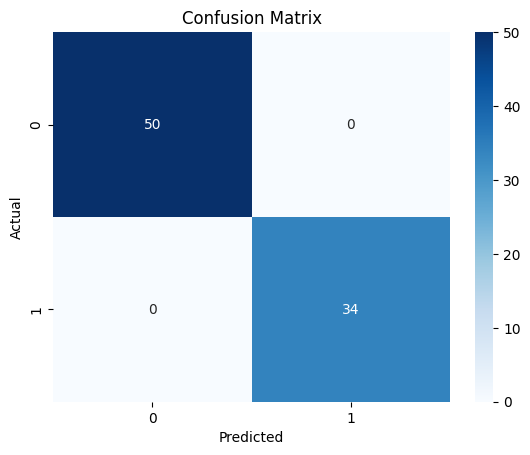

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [17]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred_rf))

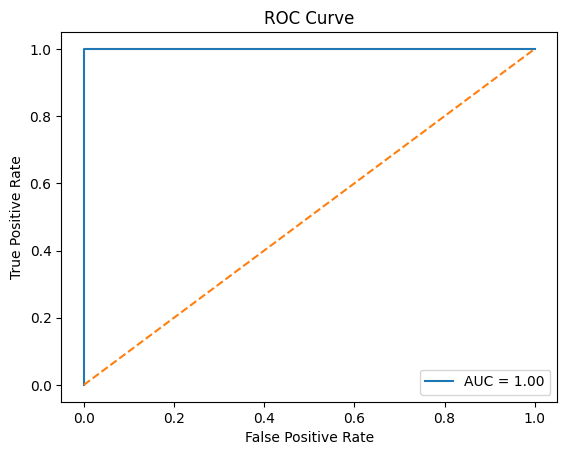

In [28]:
y_prob = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [29]:
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

y_pred_linear = lin_model.predict(X_test_scaled)

print(y_pred_linear[:10])


[2.22044605e-16 1.00000000e+00 3.88578059e-16 0.00000000e+00
 1.00000000e+00 0.00000000e+00 1.00000000e+00 1.11022302e-16
 1.00000000e+00 1.11022302e-16]


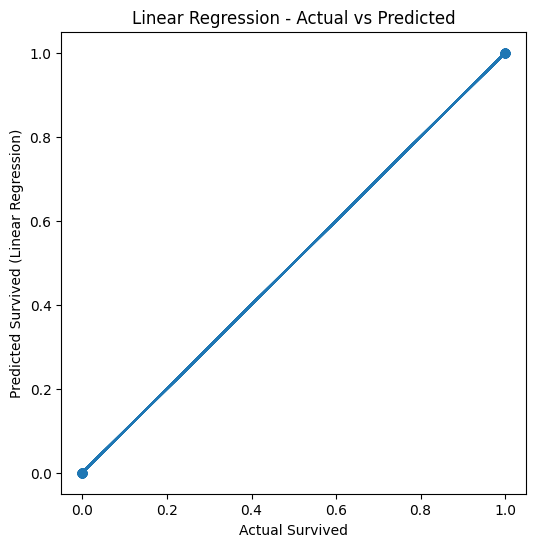

In [30]:
# Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

# Predict
y_pred_linear = lin_model.predict(X_test_scaled)

# Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_linear)

plt.xlabel("Actual Survived")
plt.ylabel("Predicted Survived (Linear Regression)")
plt.title("Linear Regression - Actual vs Predicted")

# Add best fit line
z = np.polyfit(y_test, y_pred_linear, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test))

plt.show()
